### Evaluated on Validation Dataset

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import os
import timm
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

# Set paths and class names
val_dir = r"D:\project\Watermark_Detection\dataset\wm-nowm-final\val"
class_names = ['no-watermark', 'watermark']
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

# Load model
model = timm.create_model('convnext_tiny', pretrained=True, num_classes=2)
model.load_state_dict(torch.load('logoconvnext_best_model.pth', map_location=torch.device('cpu')))
model.eval()

# Define transform
input_size = 256
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Prepare data
y_true = []
y_pred = []

# Loop through classes and images
for class_name in class_names:
    class_path = os.path.join(val_dir, class_name)
    label = class_to_idx[class_name]

    for img_name in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
        img_path = os.path.join(class_path, img_name)

        try:
            image = Image.open(img_path).convert('RGB')
            image = transform(image).unsqueeze(0)

            with torch.no_grad():
                output = model(image)
                _, predicted = torch.max(output, 1)

            y_true.append(label)
            y_pred.append(predicted.item())
        except Exception as e:
            print(f"Failed to process {img_path}: {e}")

# Generate metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Processing watermark: 100%|██████████| 3529/3529 [05:10<00:00, 11.35it/s]



Classification Report:
              precision    recall  f1-score   support

no-watermark       0.89      0.89      0.89      3519
   watermark       0.89      0.89      0.89      3529

    accuracy                           0.89      7048
   macro avg       0.89      0.89      0.89      7048
weighted avg       0.89      0.89      0.89      7048

Confusion Matrix:
[[3141  378]
 [ 386 3143]]


              precision    recall  f1-score    support
no-watermark   0.890559  0.892583  0.891570  3519.0000
watermark      0.892644  0.890621  0.891631  3529.0000
accuracy       0.891600  0.891600  0.891600     0.8916
macro avg      0.891601  0.891602  0.891600  7048.0000
weighted avg   0.891603  0.891600  0.891600  7048.0000


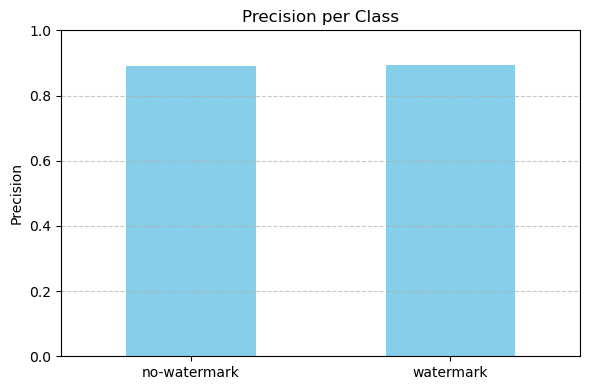

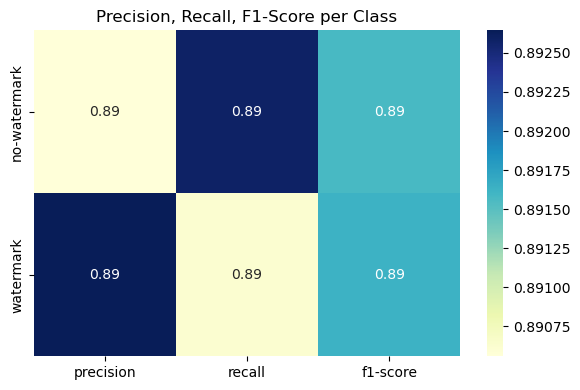

In [2]:
# Classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Plot precision bar chart
plt.figure(figsize=(6, 4))
report_df.loc[class_names, "precision"].plot(kind='bar', color='skyblue')
plt.title("Precision per Class")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot heatmap of precision, recall, F1-score
plt.figure(figsize=(6, 4))
metrics_only = report_df.loc[class_names, ['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_only, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Precision, Recall, F1-Score per Class")
plt.tight_layout()
plt.show()

## Evaluated on Test Dataset (Includes logo , transparent , semi-transparent , text Watermarks)

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import os
import timm
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

# Set paths and class names
val_dir = r"D:\project\Watermark_Detection\dataset\wm-nowm-final\test"
class_names = ['no-watermark', 'watermark']
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

# Load model
model = timm.create_model('convnext_tiny', pretrained=True, num_classes=2)
model.load_state_dict(torch.load('logoconvnext_best_model.pth', map_location=torch.device('cpu')))
model.eval()

# Define transform
input_size = 256
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Prepare data
y_true = []
y_pred = []

# Loop through classes and images
for class_name in class_names:
    class_path = os.path.join(val_dir, class_name)
    label = class_to_idx[class_name]

    for img_name in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
        img_path = os.path.join(class_path, img_name)

        try:
            image = Image.open(img_path).convert('RGB')
            image = transform(image).unsqueeze(0)

            with torch.no_grad():
                output = model(image)
                _, predicted = torch.max(output, 1)

            y_true.append(label)
            y_pred.append(predicted.item())
        except Exception as e:
            print(f"Failed to process {img_path}: {e}")

# Generate metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Processing watermark: 100%|██████████| 40/40 [00:09<00:00,  4.28it/s]


Classification Report:
              precision    recall  f1-score   support

no-watermark       0.92      0.90      0.91        40
   watermark       0.90      0.93      0.91        40

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

Confusion Matrix:
[[36  4]
 [ 3 37]]


              precision  recall  f1-score  support
no-watermark   0.923077  0.9000  0.911392  40.0000
watermark      0.902439  0.9250  0.913580  40.0000
accuracy       0.912500  0.9125  0.912500   0.9125
macro avg      0.912758  0.9125  0.912486  80.0000
weighted avg   0.912758  0.9125  0.912486  80.0000


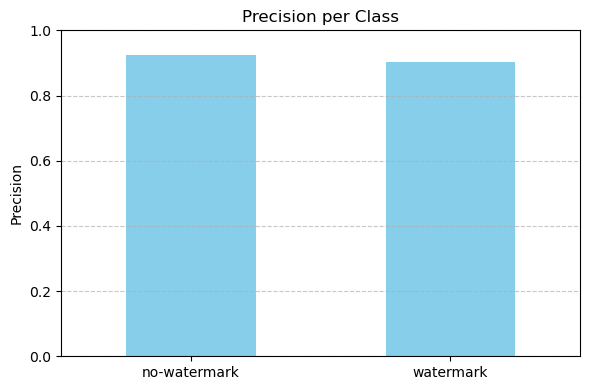

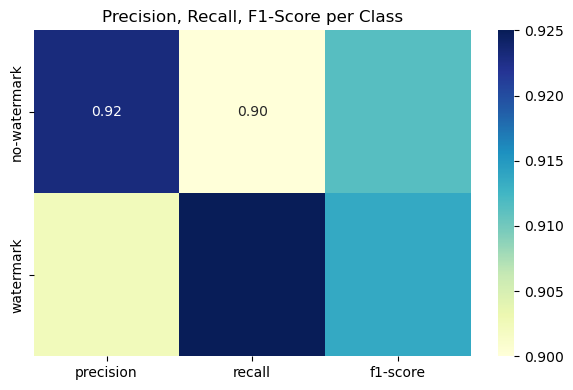

In [4]:
# Classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Plot precision bar chart
plt.figure(figsize=(6, 4))
report_df.loc[class_names, "precision"].plot(kind='bar', color='skyblue')
plt.title("Precision per Class")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot heatmap of precision, recall, F1-score
plt.figure(figsize=(6, 4))
metrics_only = report_df.loc[class_names, ['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_only, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Precision, Recall, F1-Score per Class")
plt.tight_layout()
plt.show()